# Data exploration
We explore some elements of our dataset including
* Number of parlement members
* Party affiliations
* Paid and unpaid interest groups


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import plotly.graph_objects as go

## Download and unzip the dataset

Download json dataset from lobbywatch.ch

In [8]:
!mkdir data
!wget https://cms.lobbywatch.ch/sites/lobbywatch.ch/files/exports/lobbywatch_export_aggregated.json.zip
!unzip lobbywatch_export_aggregated.json.zip -d data
!rm lobbywatch_export_aggregated.json.zip

--2024-03-27 15:22:16--  https://cms.lobbywatch.ch/sites/lobbywatch.ch/files/exports/lobbywatch_export_aggregated.json.zip
Resolving cms.lobbywatch.ch (cms.lobbywatch.ch)... 149.126.4.43, 2a01:ab20:0:4::43
Connecting to cms.lobbywatch.ch (cms.lobbywatch.ch)|149.126.4.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14972817 (14M) [application/zip]
Saving to: ‘lobbywatch_export_aggregated.json.zip’

lobbywatch_export_a 100%[===================>]  14.28M  23.9MB/s    in 0.6s    

2024-03-27 15:22:16 (23.9 MB/s) - ‘lobbywatch_export_aggregated.json.zip’ saved [14972817/14972817]

Archive:  lobbywatch_export_aggregated.json.zip
  inflating: data/lobbywatch_daten_merkblatt.pdf  
  inflating: data/lobbywatch_datenmodell_simplified.pdf  
  inflating: data/aggregated_essential_parlamentarier_nested.json  
  inflating: data/aggregated_parlamentarier_nested.json  
  inflating: data/export/docu/aggregated_essential_parlamentarier_nested.json.md  
  inflating: data/expo

In [10]:
data_path = "data/aggregated_parlamentarier_nested.json"

### Open the data with pandas

In [11]:
df = pd.read_json(data_path)

In [12]:
display(df.head(5)) # Display 5 parlementary members
print(f"We got {len(pd.unique(df['id']))} parlementary membres") # output the number of members


,anzeige_name,anzeige_name_de,anzeige_name_fr,name,name_de,name_fr,id,nachname,vorname,vorname_kurz,...,titel_de,titel_fr,parlamentarier_id,verguetungstransparenz_beurteilung_stichdatum,verguetungstransparenz_beurteilung,refreshed_date,in_kommission,parlamentarier_transparenz,interessenbindungen,zutrittsberechtigungen
0,"de Courten, Thomas","de Courten, Thomas","de Courten, Thomas",Thomas Jan de Courten,Thomas Jan de Courten,Thomas Jan de Courten,6,de Courten,Thomas,None,...,Nationalrat,Le Conseiller national,6,None,None,2024-03-27 02:31:29,"[{'abkuerzung': 'GPK-N', 'abkuerzung_fr': 'CdG...","[{'id': 52, 'parlamentarier_id': 6, 'stichdatu...","[{'anzeige_name': '383, de Courten, Thomas, Ko...","[{'id': 1387, 'anzeige_name': 'Schalch, Lucas'..."
1,"Hess, Lorenz","Hess, Lorenz","Hess, Lorenz",Lorenz Linus Hess,Lorenz Linus Hess,Lorenz Linus Hess,11,Hess,Lorenz,None,...,Nationalrat,Le Conseiller national,11,2020-12-31,nein,2024-03-27 02:31:29,"[{'abkuerzung': 'SGK-NR', 'abkuerzung_fr': 'CS...","[{'id': 121, 'parlamentarier_id': 11, 'stichda...","[{'anzeige_name': '73, Hess, Lorenz, GEWA, bei...","[{'id': 665, 'anzeige_name': 'Beutler, Nicole'..."
2,"Lohr, Christian","Lohr, Christian","Lohr, Christian",Christian Lohr,Christian Lohr,Christian Lohr,14,Lohr,Christian,None,...,Nationalrat,Le Conseiller national,14,None,None,2024-03-27 02:31:29,"[{'abkuerzung': 'SGK-NR', 'abkuerzung_fr': 'CS...","[{'id': 142, 'parlamentarier_id': 14, 'stichda...","[{'anzeige_name': '5599, Lohr, Christian, Comp...",[]
3,"Schneeberger, Daniela","Schneeberger, Daniela","Schneeberger, Daniela",Daniela Schneeberger,Daniela Schneeberger,Daniela Schneeberger,21,Schneeberger,Daniela,None,...,Nationalrätin,La Conseillère nationale,21,None,None,2024-03-27 02:31:29,"[{'abkuerzung': 'WAK-NR', 'abkuerzung_fr': 'CE...","[{'id': 211, 'parlamentarier_id': 21, 'stichda...","[{'anzeige_name': '7150, Schneeberger, Daniela...","[{'id': 627, 'anzeige_name': 'Jenni-Lincoln, V..."
4,"Aebischer, Matthias","Aebischer, Matthias","Aebischer, Matthias",Matthias Aebischer,Matthias Aebischer,Matthias Aebischer,40,Aebischer,Matthias,None,...,Nationalrat,Le Conseiller national,40,None,None,2024-03-27 02:31:29,"[{'abkuerzung': 'WBK-NR', 'abkuerzung_fr': 'CS...","[{'id': 4, 'parlamentarier_id': 40, 'stichdatu...","[{'anzeige_name': '13102, Aebischer, Matthias,...","[{'id': 63, 'anzeige_name': 'Bütikofer, Etienn..."


We got 246 parlementary membres


We can see there is 246 parlementary members, this is the right number.

### What political party are represented and how many parlement members per party

In [27]:
df['partei_name_de'].value_counts()

partei_name_de
Schweizerische Volkspartei           68
Sozialdemokratische Partei           50
Die Mitte                            44
Freisinnig-Demokratische Partei      38
Grüne Partei der Schweiz             24
Grünliberale Partei                  11
Mouvement Citoyens Romands            3
Evangelische Volkspartei              2
Eidgenössisch-Demokratische Union     2
Lega dei Ticinesi                     1
Basels starke Alternative             1
Alternative - die Grünen Zug          1
Liberal-Demokratische Partei          1
Name: count, dtype: int64

We can see the number of parlementary memembers for each party. We can represent this in a pie chart.

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

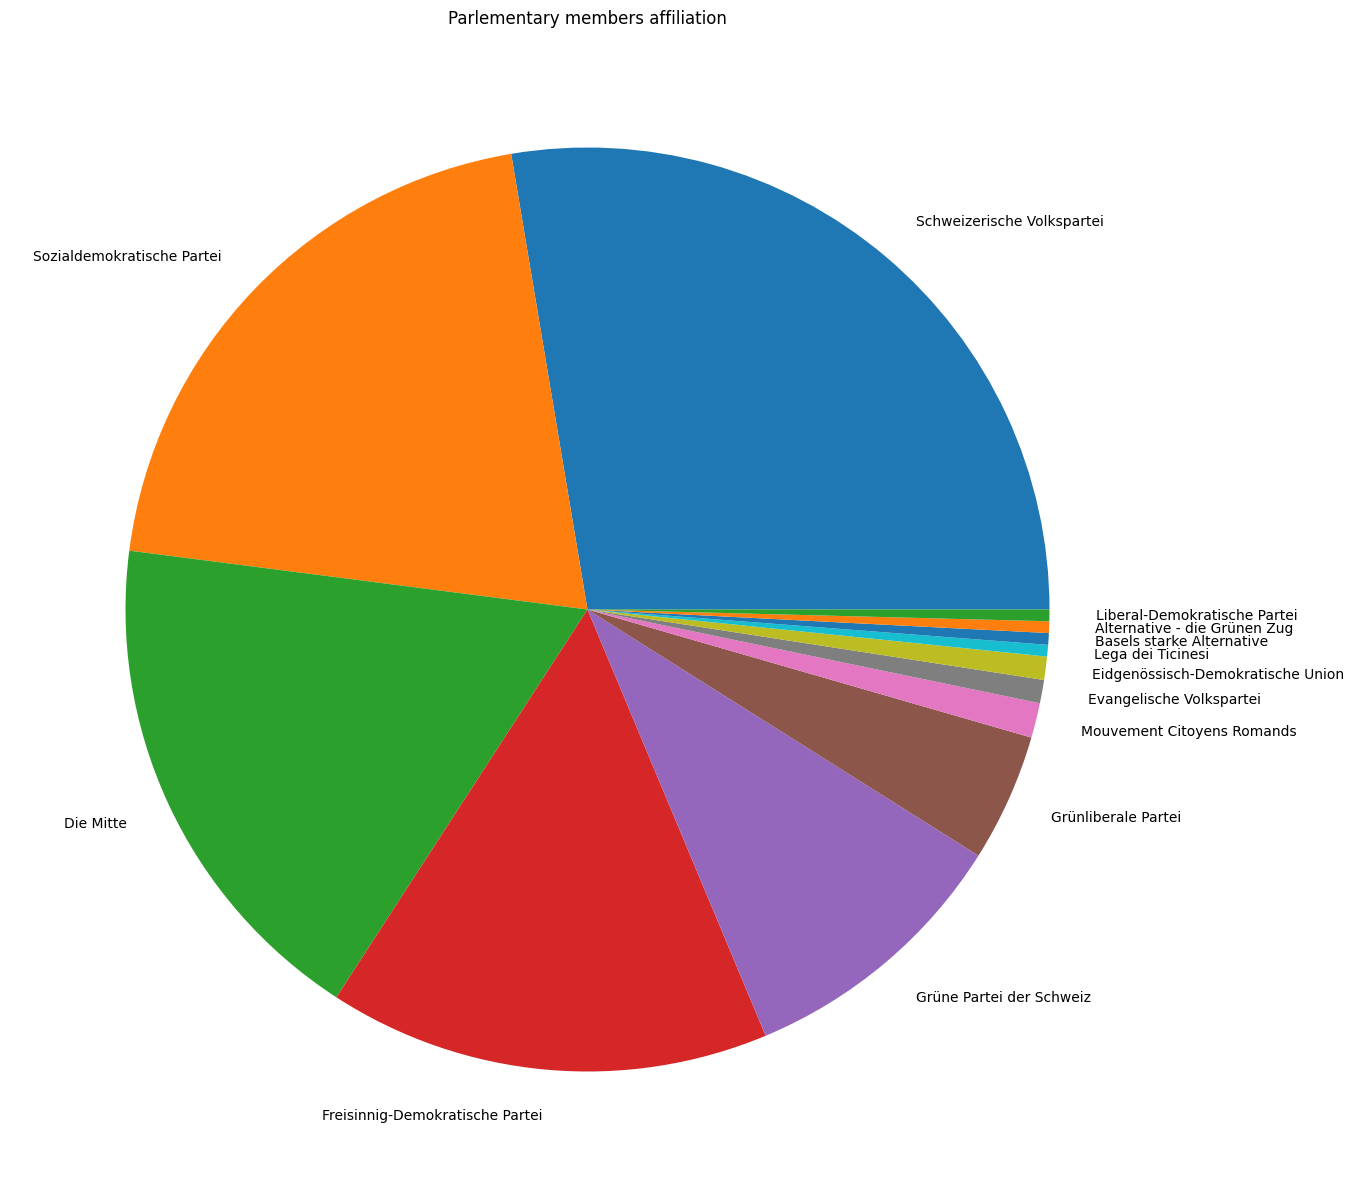

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Parlementary members affiliation')

ax.pie(df['partei_name_de'].value_counts().values, labels=df['partei_name_de'].value_counts().index)
plt.figure()    

## Now we can have a look at the interest declaration

This information contains what organisation they are a member of, what their position is, if they are paid or unpaid...

In [34]:
# Counting interests declarations per parlementary member
df['interessenbindungen_count'] = df['interessenbindungen'].apply(lambda x : len(x))

In [47]:
# Describing how many declaration each member for each party
df.groupby('partei_name_de').describe()['interessenbindungen_count']

,count,mean,std,min,25%,50%,75%,max
partei_name_de,,,,,,,,
Alternative - die Grünen Zug,1.0,41.000000,NaN,41.0,41.00,41.0,41.00,41.0
Basels starke Alternative,1.0,33.000000,NaN,33.0,33.00,33.0,33.00,33.0
Die Mitte,44.0,31.727273,17.111622,5.0,15.75,27.5,48.25,64.0
Eidgenössisch-Demokratische Union,2.0,14.000000,9.899495,7.0,10.50,14.0,17.50,21.0
Evangelische Volkspartei,2.0,29.000000,18.384776,16.0,22.50,29.0,35.50,42.0
Freisinnig-Demokratische Partei,38.0,32.263158,18.484009,6.0,20.25,32.0,43.50,95.0
Grüne Partei der Schweiz,24.0,33.125000,15.593512,12.0,20.25,32.0,44.75,62.0
Grünliberale Partei,11.0,35.090909,19.755782,3.0,28.00,33.0,41.50,80.0
Lega dei Ticinesi,1.0,18.000000,NaN,18.0,18.00,18.0,18.00,18.0


For example, we observe that, while they have similar size, Sozialdemokratische Partei (PS) members have declared more affiliations than Schweizerische Volkspartei (UDC) members but we also observe a large standard deviation for the PS.
This can make sense as we can see this party has both a member with the least declarations and the maximum declarations.

We can also see that informations from small parties if we analyse trends in parties as they do not have enough representatives in the parlement to produce meaningful data.
As of now, we will use data from the large parties only.

For the top 5 parties (UDC, PS, PLR, Le Centre, Vert.es), we observe the greens are the ones with more declared affiliations.

## Paid or unpaid affiliations

Parlementary members declare all types of affiliations, to be volunteer at a non-profit that feed homeless people or consultant for an oil company is counted the same. Let's simply separate between paid and unpaid for now.
We decided to count reimbursement for costs as unpaid but compensation as paid. We may decide to change that later on.

In [49]:
# we need to classify paid and unpaid by hand for now as there is no binary value in the dataset
paid_positions = [
    'Bezahlt', 
    'Bezahlendes Mitglied', 
    'Betrag siehe Stiftung Visana Plus', 
    'Sitzungsgeld, nach Aufwand', 
    'Das Mandat als VR-Präsidentin ist nicht vergütet, die Geschäftsleitung schon.', 
    'Das Mandat als VR-Präsidentin ist nicht vergütet, die Geschäftsleitung schon.', # This is repeated, but assuming it indicates a paid position.
    'inkl. Spesen', 
    'Versteuerte Einkünfte', 
    'Spesen', 
    'Entschädigung inkl. Spesen', 
    'Zusätzlich 3000.- Spesen', 
    'Zusätzlich 3000 Fr./Jahr Spesen', 
    'Zusätzlich 500.- Spesen', 
    'Zusätzlich 500 Fr./Jahr Spesen', 
    'Für vier halbtägige Sitzungen inkl. Vor- und Nachbereitung', 
    'inkl. Spesenentschädigung', 
    'Sitzungsgeld', 
    'ungefähre Vergütung', 
    'Vergütung kann sich auf bis zu 5000.- belaufen.', 
    'Vergütung gemäss Geschäftsbericht (Durchschnitt)', 
    'Entschädigung 1000 Fr./Monat', 
    'Entschädigung', 
    'Zahlendes Mitglied', 
    'CHF 400.- CHF pro Sitzung. Maximal 4 pro Jahr', 
    'CHF 400 pro Sitzung', 
    'Von NR Glättli bezahlte Mandatsabgaben: Fr. 9000.-', 
    'Verzicht auf Entschädigung / renoncé à la rémuneration', 
    'maximal, je nach Anzahl Sitzungen / maximum, selon les participations aux séances.', 
    'Verzicht ab Sommer 2018 - renoncé à la rémuneration depuis été 2018', 
    'maximal, abhängig vom Geschäftsgang / maximum, selon le résultat de l\'entreprise', 
    'Je nach Anzahl Sitzungen 800-1500 Fr. /Jahr', 
    'Jährlich variierende Aufwandentschädigung', 
    'Unbezahlt im Jahr 2023, zuvor auch schon bezahlt', 
    'Spesen pro Sitzung', 
    'Spesen bis max. 500 Fr./Jahr', 
    'Entschädigung nach Studenaufwand (35.-/Stunde)', 
    'Spesenpauschale', 
    '150.- pro Sitzung', 
    'Je nach Aufwand zwischen 3000 und 10000 Fr./Jahr', 
    'Inklusive 300 Franken Spesen', 
    'Vergütung als Beratertätigkeit an die Firma Jost Wohlen AG (Keine Auszahlung an Matthias Jauslin)', 
    'Spesenvergütung', 
    'Pauschale Spesenentschädigung', 
    'plus Pauschalspesen von 6000.-', 
    'Lohn als Arbeitnehmer, plus 3600.-/Jahr Pauschalspesen, das VR-Präsidium ist nicht vergütet', 
    'Je nach Anzahl Sitzungen 800-1500 Fr. /Jahr', 
    'Entschädigung/Spesen', 
    'ca. 10 Sitzungen/Jahr à 100 Franken', 
    'bis zu 4 Sitzungen pro Jahr à 150 Franken Sitzungsgeld', 
    'Les indemnités vont à la Commune', 
    'les indemnités sont versées à la Commune', 
    'inkl. Sitzungsgelder', 
    'Teil der Entschädigung der Ypsomed Holding AG', 
    'max. Lohn', 
    'Bezahlt, aber Vergütung geht in Stadtkasse. Amt in Verbindung mit "Gemeinderat der Stadt Bern".', 
    'Bezahlt (50% Pensum)', 
    'Bezahlt, inkl. Sitzungsgeld', 
    'Bezahlt, inkl. Sitzungsgelder', 
    'Bezahlt in Sitzungsgelder', 
    'Bezahlt, als Vertreterin des Schweizerischen Gewerkschaftsbundes, Vergütung geht direkt an Unia.', 
    'Bezahlt, inkludiert im Gemeindepräsidium', 
    'Bezahlt, als Vertreter des Kantons Glarus', 
    'inkl. 1000.- Spesenentschädigung', 
    'Bezahlt (ca. 900.-)', 
    'Bezahlt (max. 900.-)', 
    'Bezahlt (max. 3000.-)', 
    'Max. Vergütung, Betrag zwischen 600-800.-', 
    'Max. Vergütung, Betrag zwischen 200-300.-', 
    'Max. Vergütung', 
    'max. Taggelder', 
    'Bezahlt, ca. 50% Pensum', 
    '60% Pensum', 
    'Maximalbetrag', 
    'Bezahlt, Mandat der Firma Zryd & Reinhard GmbH',
    'Zusätzliches Sitzungsgeld: 400 Fr./Halbtag, 800 Fr./Tag', 
    '600-900 Fr./Jahr', 
    '600-1000 Fr./Jahr', 
    'Rémunération par séance plénière / Entschädigung pro Vollversammlung', 
    'Rémunération par séance plénière / Entschädigung pro Sitzung', 
    'ehrenamtlich; von NR Glättli bezahlte Mandatsabgaben: Fr. 5000.-', 
    'maximal, abhängig vom Geschäftsgang / maximum, selon le résultat de l\'entreprise', 
    'inkl. 1000.- Spesenentschädigung', 
    'Plus 5000 Fr./Jahr Spesen', 
    '40%-Pensum', 
    'Mi-temps / 50-Prozent-Stelle', 
    'Bezahlt (max. 320.-)', 
    'Part de revenu sur honoraires versés à son étude/Teil der Entschädigung geht an seine Kanzlei', 
    'Je nach Geschäftsgang zwischen 0.- und 20\'000.-/Jahr', 
    'Lohn (brutto)', 
    'Lohn, inkl Sitzungsgeld und Spesen', 
    'Jährliche Investition von C. Wasserfallen:2500 Fr./Jahr', 
    'Spesen bis max. 500 Fr./Jahr', 
    'Bezahlt, max. Betrag: 3000.-', 
    'Bezahlt (Maximales Sitzungsgeld)', 
    'max. Pauschalbetrag', 
    'Maximalbetrag', 
    'Teilzeitpensum', 
    'Versteuerte Einkünfte', 
    'Vergütet im Rahmen des Mandats bei les Fils Maye SA/Rémunération inclus dans le mandat Les fils Maye', 
    'Mandat in Verbindung mit "Gemeinderat der Stadt Bern"', 
    'Gesamte Einkünfte aus allen Mandaten, abzüglich Kosten', 
    'Bezahlt (je nach Sitzungen)', 
    '40 Fr. par séance de commission', 
    'Inkl. Sitzungsgelder', 
    'nach Aufwand', 
    '2058 Fr./Jahr davon sind Spesen', 
    'bis zu 4 Sitzungen pro Jahr à 150 Franken Sitzungsgeld', 
    'Inklusive 300 Franken Spesen', 
    'Bezahlt, Mandat der Firma Zryd & Reinhard GmbH'
    '(inkl.Sitzungsgelder)', 
    'je nach Auswand/Sitzungen', 
    'Défraiement', 
    'Sitzungsentschädigung', 
    'Spende', 
    'Entschädigung zusammen mit "alpinfra"', 
    'Entschädigung zusammen mit "Schweizerischer Fonds für Hilfe bei nicht versicherbaren Elementarschäden"', 
    'Sehr variabel, selbständige Tätigkeit', 
    'Jahresentschädigung', 
    'Teil der Entschädigung geht an seine Kanzlei', 
    'Abhängig von der Anzahl Sitzungen', 
    'Bezahlt (Zuätzlich Spesen- und Sitzungsgelder', 
    'Bezahlt, siehe Obere Mühle Alterswohnungen AG', 
    'ungefähre Sitzungsgelder', 
    'Pauschalbetrag', 
    'Ungefährer Durchschnittswert', 
    'Vergütung gilt auch für Obere Mühle Alterswohnungen AG', 

]

unpaid_positions = [
    'Ehrenamtlich', 
    'Ehrenamtlich, Spende', 
    'Spesenentschädigung', 
    'Ehrenamtlich (Sitzungsgeld)', 
    'ehrenamtlich', 
    'CHF 5 francs par séance plénière. 35 francs par séance de commission. Cela représente moins de 100 francs par année.', 
    'Pas de réunion depuis au moins 2 ans. Donc aucune rémunération en 2019 et 2020.', 
    'Keine', 
    'Reversée à l\'association /Vereinigung gespendetan', 
    'Wegen Amt der Nationalratspräsidentin wird Vergütung und Pensum ausgesetzt.', 
    'Ehrenamtlich, Spesenentschädigung', 
    'Ehrenamtlich (Verzicht auf Entschädigung)', 
    'Ex officio im Rahmen des Regierungsrats-Mandats', 
    'Mandat in Verbindung mit Gemeinderat. Vergütung geht direkt an die Gemeinde.', 
    'Ehrenamtlich (In der Entschädigung der Einwohnergemeinde Flühli eingeschlossen)', 
    'Ehrenamtlich (In der Entschädigung der Einwohnergemeinde Flühli eingeschlossen)', 
    'Ehrenamtlich (Verzicht auf Entschädigung)', 
    'Les indemnités vont à la Commune', 
    'les indemnités sont versées à la Commune', 
    'nach Aufwand', 
]

In [50]:
df['interessenbindungen_paid']=0
df['interessenbindungen_unpaid']=0
for row in df.index:
    for el1 in df['interessenbindungen'][row]:
        for el2 in el1['verguetungen']:
            if (el2['beschreibung']!= None):# and (el2['beschreibung'] not in unpaid_positions) and (el2['beschreibung'] not in paid_positions):
                if el2['beschreibung'] in unpaid_positions:
                    df.loc[row,'interessenbindungen_unpaid'] = df.loc[row,'interessenbindungen_unpaid'] + 1
                if el2['beschreibung'] in paid_positions:
                    df.loc[row,'interessenbindungen_paid'] = df.loc[row,'interessenbindungen_paid'] + 1


Let's check the proportion of paid position vs unpaid per party

In [65]:
(df.groupby('partei_name_de').sum()['interessenbindungen_paid']/(df.groupby('partei_name_de').sum()['interessenbindungen_unpaid']+df.groupby('partei_name_de').sum()['interessenbindungen_paid'])).sort_values(ascending=False)

partei_name_de
Alternative - die Grünen Zug         0.782313
Eidgenössisch-Demokratische Union    0.571429
Mouvement Citoyens Romands           0.555556
Sozialdemokratische Partei           0.491519
Schweizerische Volkspartei           0.481043
Grüne Partei der Schweiz             0.455797
Freisinnig-Demokratische Partei      0.383186
Die Mitte                            0.359265
Basels starke Alternative            0.243243
Liberal-Demokratische Partei         0.233333
Lega dei Ticinesi                    0.228571
Grünliberale Partei                  0.071869
Evangelische Volkspartei             0.040000
dtype: float64

Now let's visualize this

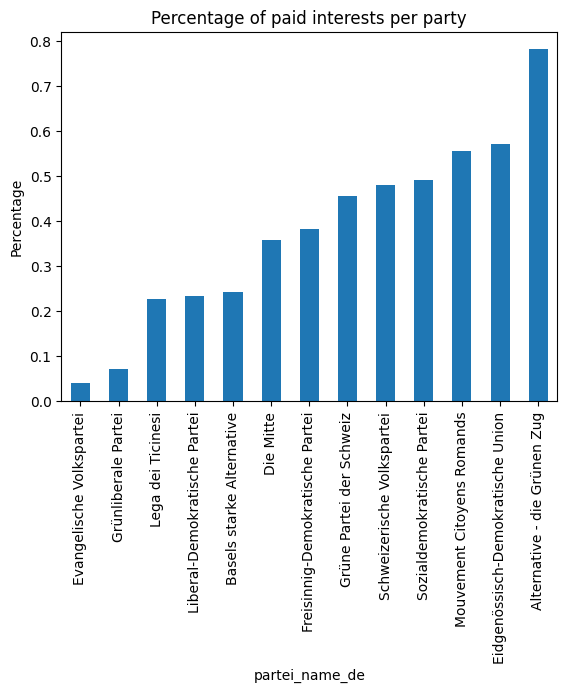

In [70]:
plt.figure()
plt.title("Percentage of paid interests per party")
plt.ylabel('Percentage')
(df.groupby('partei_name_de').sum()['interessenbindungen_paid']/(df.groupby('partei_name_de').sum()['interessenbindungen_unpaid']+df.groupby('partei_name_de').sum()['interessenbindungen_paid'])).sort_values().plot.bar()
plt.show()

## Let's check what kind of organisations are declared

In [92]:
# For example, let's get a random declared interest group.
df.sample()['interessenbindungen'].values[0][0]['organisation']['name']

'SWISSAID, Schweizerische Stiftung für Entwicklungszusammenarbeit; SWISSAID, Fondation Suisse pour la coopération au développement; SWISSAID, Fondazione Svizzera per la cooperazione allo sviluppo'

### Finding organisation with the most declarations

In [131]:
organisation_id = []
organisation_dict = {}
error_cnt = 0
for row in df.index:
    for el1 in df.loc[row, 'interessenbindungen']:
        try:
            organisation_dict[el1['organisation']['id']] = el1['organisation']['name']
            organisation_id.append(el1['organisation']['id'])
        except:
            print('Got one error reading name of organization')
            error_cnt +=1
print(f"In total got {error_cnt} errors")
counter = Counter(organisation_id)
# Now print the 10 most named organization
for key, value in counter.most_common(10):
    print(f'Orga {key} - {organisation_dict[key]} has {value} parlementary members')

Got one error reading name of organization
In total got 1 errors
Orga 1751 - Sport; Sport has 98 parlementary members
Orga 2899 - Wohn- und Grundeigentum; Propriété immobilière et foncière; Proprietà immobiliare e fondiaria has 86 parlementary members
Orga 2124 - Bildung, Forschung und Innovation; Formation, recherche et innovation; Formazione, la ricerca e l'innovazione has 70 parlementary members
Orga 4111 - Landwirtschaftlicher Klub der Bundesversammlung; Club agricole de l'Assemblée fédérale has 64 parlementary members
Orga 1750 - Bundeshaus-Band; Bundeshaus-Band has 56 parlementary members
Orga 7594 - Behindertenfragen; Pour les questions relatives aux personnes handicapées; Persone con disabilità has 55 parlementary members
Orga 637 - Biodiversität und Artenschutz; Biodiversité et gestion des espèces has 55 parlementary members
Orga 5964 - lingua e cultura rumantscha; lingua e cultura rumantscha; lingua e cultura rumantscha has 54 parlementary members
Orga 1622 - Tourismus PGT; T

### We see that some are very general, let's only count positions that are paid

In [136]:
organisation_id = []
organisation_dict = {}
error_cnt = 0
for row in df.index:
    for el1 in df.loc[row, 'interessenbindungen']:
        paid = False
        try:
            for el2 in el1['verguetungen']:
                if (el2['beschreibung']!= None):
                    if el2['beschreibung'] in paid_positions:
                        paid = True
            if paid:
                organisation_dict[el1['organisation']['id']] = el1['organisation']['name']
                organisation_id.append(el1['organisation']['id'])
        except:
            print('Got one error reading name of organization')
            error_cnt +=1
print(f"In total got {error_cnt} errors")
counter = Counter(organisation_id)
# Printing the 20 most named organizations
for key, value in counter.most_common(20):
    print(f'Orga {key} - {organisation_dict[key]} has {value} parlementary members')

In total got 0 errors
Orga 576 - Pro Natura - Schweizerischer Bund für Naturschutz has 14 parlementary members
Orga 130 - Schweizerischer Verband des Personals öffentlicher Dienste (V.P.O.D.); Syndicat suisse des services publics; Sindacato svizzero dei servizi pubblici has 14 parlementary members
Orga 602 - WWF Schweiz; WWF Suisse; WWF Svizzera has 12 parlementary members
Orga 1344 - Schweizer Paraplegiker-Stiftung; Fondation suisse pour paraplégiques; Fondazione svizzera per paraplegici has 11 parlementary members
Orga 989 - Greenpeace Schweiz has 11 parlementary members
Orga 4926 - Die Mitte Frauen Schweiz; Le Centre Femmes Suisse; Allianza dal Center svizzero delle donne has 10 parlementary members
Orga 580 - VCS Verkehrs-Club der Schweiz; ATE Association transports et environnement; ATA Associazione traffico e ambiente has 10 parlementary members
Orga 1064 - Amnesty International - Schweizer Sektion has 9 parlementary members
Orga 381 - Gewerkschaft Unia; Syndicat Unia; Sindacato 

We get a very different picture of paid interests now.

## Focus on the organisations
Now let's look at what kind of parties organisations recruit

In [108]:
# Check party membership for orga
def get_interessen_counter(orga):
    parties = []
    error_cnt = 0
    for row in df.index:
        for el1 in df.loc[row, 'interessenbindungen']:
            try:
                if el1['organisation']['id'] == orga:
                    parties.append(df.loc[row,'partei_name_de'])
            except:
                print('error')
                error_cnt +=1

    counter = Counter(parties)
    counter = dict(counter)

    all_party = pd.unique(df.partei_name_fr)
    for party in all_party:
        if party not in [*counter] and party != None:
            counter[party] = 0
    return counter

In [132]:
key = 7825 #the id of the organisation

In [133]:
counter = get_interessen_counter(key)
# Define data
source = [organisation_dict[key], *counter]
target = [*counter]
value = [*counter.values()]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=source + target,
        color="blue"
    ),
    link=dict(
        source=np.zeros(len([*counter])),
        target=list(range(1,len([*counter]))),
        value=value
    )
)])

# Update layout
fig.update_layout(title_text=f"Link between {organisation_dict[key]} and parties",
                  font=dict(size=12, color="black"),
                  width=800, height=600)

# Show the plot
fig.show()


error
